In [24]:
import numpy as np
from collections import OrderedDict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import math 
style.use('ggplot')

In [25]:
def hypothesis(x,w,j):
    h = w[0]
    X=np.ones((len(w), len(x)))
    for i in np.arange(1, len(w)):                
        X[i] = x ** (i)
    X=np.transpose(X)
    h= X@w
    return h

In [26]:
#errors
def error(X, y, w, i, j):
    if(i==0): #mean_square_error
        y1 = hypothesis(X,w,j)
        return sum((y1-y)**2)/(y.size)
    elif i==1: #mean_absolute_error
        y1 = hypothesis(X,w,j)
        return sum(abs(y1-y))/(y.size)
    elif i==2: #log_cosh_loss
        y1 = hypothesis(X,w,j)
        return np.sum(np.log(np.cosh(y1-y)))/(y.size)
    elif i==3: #root_mean_square_error
        y1 = hypothesis(X,w,j)
        return np.sqrt(sum((y1-y)**2)/(y.size))
    elif i==4: #log loss
        y1 = hypothesis(X,w,j)
        return sum(np.log(1/np.abs(y1-y))/(y.size))
    elif i==5: #KLDivergence
        y1 = hypothesis(X,w,j)
        return np.sum(y1 *( np.log(abs(y1))-np.log(abs(y))))/y.size

In [27]:
#gradient functions
def grad(X, y, h, err):
    n=y.size
    if err==0:
        return (2/n)*np.dot(np.transpose(X), h-y)
    elif err==1:
        return (1/n)*np.dot(np.transpose(X),np.sign(h-y))    
    elif err==2:
        return (1/n)*np.dot(np.transpose(X), np.tanh(h-y))
    elif err==3:
        return np.dot(np.transpose(X), h-y)/(np.sqrt(sum((h-y)**2))*n)
    elif err==4:
        return (-1/n)*np.dot((np.transpose(X),np.transpose(np.linalg.pinv(h-y))))
    elif err==5:
        return np.add(np.dot(np.transpose(X),np.log(np.abs(h/y))) , np.dot(np.transpose(X),y))

In [28]:
#basis functions
def basis(x,i):
    if(i==0):
        return x
    elif(i==1):
        #gaussian
        return np.exp(-(x**2)/2)
    elif(i==2):
        #sigmoid
        return 1/(1+np.exp(-x))
    elif(i==3):
        #tanh
        return (1-np.exp(-x))/(1+np.exp(-x))

In [29]:
#noise variance
def noise(x,w,y):
    return error(x, y, w, 0, 0)

In [30]:
def grd_des(x, y, X_test,Y_test, order=1, err=0, basis=0, tol = 10**-5, numIters = 1000, learningRate = 10**-8):
    n = len(x)
    w = np.random.normal(0,0.1,(order + 1))          
    X=np.ones((order+1, len(x)))
    for i in np.arange(1, order+1):                
        X[i] = x ** (i)
    X=np.transpose(X)
    Cost = []
    for i in range(numIters):
            h = hypothesis(x, w, 0)
            w += -learningRate * grad(X, y, h, err)
            cost = error(x, y, w, err , 0)
            Cost.append(cost)         
        
    
    plt.figure(1)
    plt.scatter(x,y,c='b')
    plt.scatter(X_test,Y_test,c='r')
    func = w[0]
    labelr= []
    labelr.append('%.*f' % (2, w[0]))
    for i in np.arange(1, len(w)):            
        labelr.append(' + ' +'%.*f' % (2, w[i]) + 'x^' + str(i) ) 
    label = ''.join(labelr)
    print(label)
    print('Using gradient descent')
    func= hypothesis(x,w,0)
    plt.plot(x, func)        
    plt.title('Polynomial Fit: Order ' + str(len(w)-1))
    plt.xlabel('x')
    plt.ylabel('y') 
    
    plt.figure(2)
    plt.plot(Cost)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost vs Iterations of Gradient Descent')
    
    plt.show()
    return w

In [31]:
def main_f(order,what,size, batch_size=5, numIters = 1000,tol = 10**-5, learningRate = 0.001, err = 0):
    if(err==0):
        print('mean_square_error')
    elif err==1:
        print('mean_absolute_error')
    elif err==2: 
        print('log_cosh_loss')
    elif err==3: 
        print('root_mean_square_error')
    elif err==4: 
        print('log loss')
    elif err==5: 
        print('KLDivergence')
        
    if(what==0):
        print('Calculating w by psuedo_inverse')
    elif what==1:
        print('Calculating w by gradient descent')
        
    print('Polynomial Order:' + str(order))
    
    data_set= pd.read_csv("https://web.iitd.ac.in/~seshan/a1/group09.txt", sep="\s+")
    global X
    global Y
    X = data_set.iloc[:size,0].values
    Y = data_set.iloc[:size,1].values
    X_train = []
    X_test = []
    Y_train = []
    Y_test = []
    for i in range(0,20):
        if i%5 == 0:
            X_test.append(data_set.iloc[i,0])
            Y_test.append(data_set.iloc[i,1])
        else:
            X_train.append(data_set.iloc[i,0])
            Y_train.append(data_set.iloc[i,1])  
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)
    
    if what == 0:
        return perf_on_test(X_train, Y_train, X_test, Y_test,order)     
    else:
        w = grd_des(X_train, Y_train, X_test, Y_test, order, err, 0, tol, numIters, learningRate)
        cost_train= error(X_train, Y_train, w,err,0)
        print('Training Cost: ' + str(cost_train))
        cost_test= error(X_test, Y_test, w, err,0)
        print('Testing Cost: ' + str(cost_test))
        noisee = noise(X,w,Y)
        print('Noise: ' + str(noisee))

mean_absolute_error
Calculating w by gradient descent
Polynomial Order:1
-97.26 + 1405.49x^1
Using gradient descent


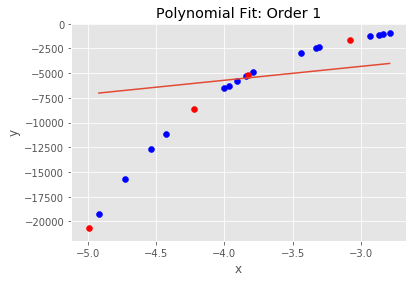

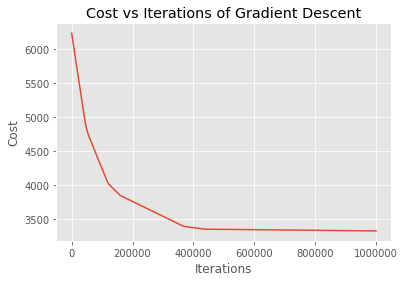

Training Cost: 3321.1577221942753
Testing Cost: 4814.668968101953
Noise: 27058813.572357077
mean_absolute_error
Calculating w by gradient descent
Polynomial Order:2
514.20 + -875.14x^1 + -651.09x^2
Using gradient descent


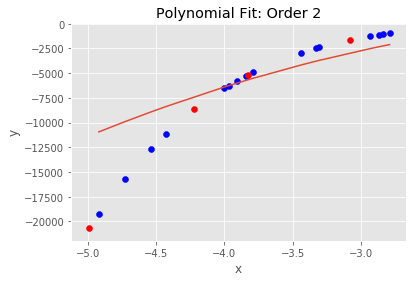

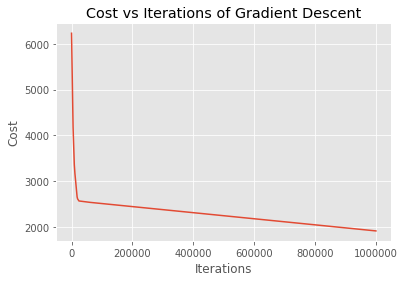

Training Cost: 1912.335334470412
Testing Cost: 3106.0897138893515
Noise: 11274318.50994737
mean_absolute_error
Calculating w by gradient descent
Polynomial Order:3
35.46 + -241.16x^1 + 717.30x^2 + 305.27x^3
Using gradient descent


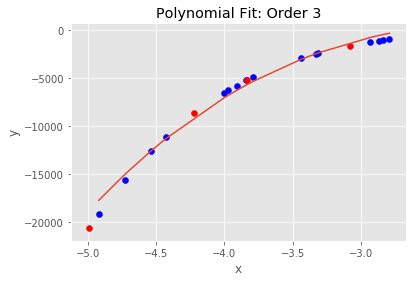

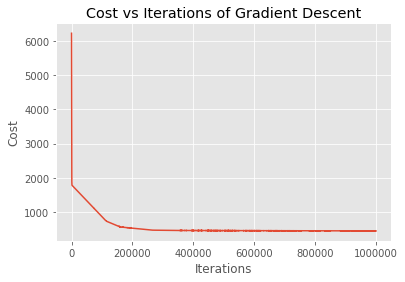

Training Cost: 445.5384100655747
Testing Cost: 775.7741378054117
Noise: 448846.511621134
mean_absolute_error
Calculating w by gradient descent
Polynomial Order:4
-112.66 + 191.37x^1 + -171.70x^2 + -260.31x^3 + -76.84x^4
Using gradient descent


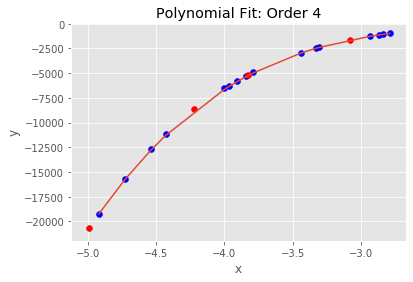

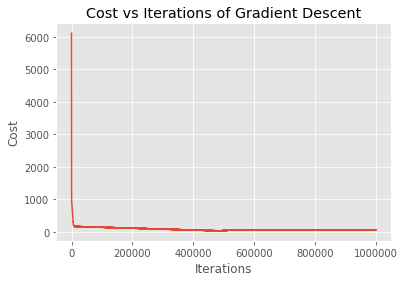

Training Cost: 63.41516038127583
Testing Cost: 68.04063972772843
Noise: 6925.241311672621
mean_absolute_error
Calculating w by gradient descent
Polynomial Order:5
0.05 + -0.13x^1 + -0.16x^2 + 0.29x^3 + -1.64x^4 + 7.13x^5
Using gradient descent


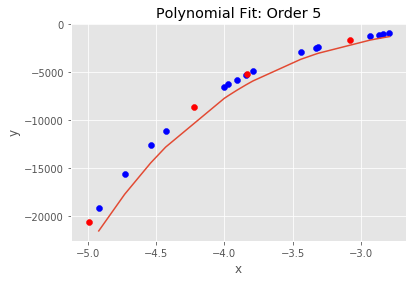

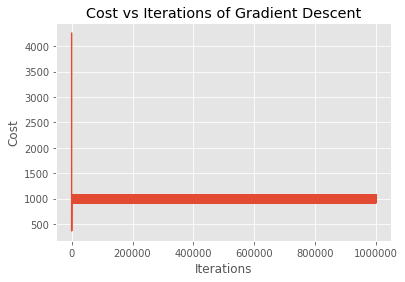

Training Cost: 1072.5942086491877
Testing Cost: 1365.1697899264739
Noise: 1697032.0291468531
mean_absolute_error
Calculating w by gradient descent
Polynomial Order:6
-0.20 + -0.06x^1 + 0.04x^2 + 0.06x^3 + 0.16x^4 + 0.13x^5 + -0.03x^6
Using gradient descent


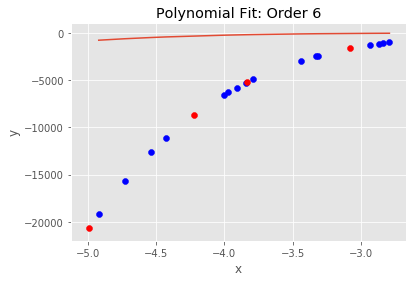

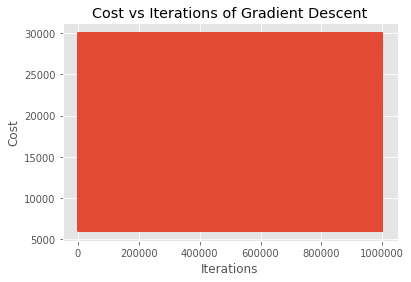

Training Cost: 5997.523914897937
Testing Cost: 8691.354232438925
Noise: 75013691.34400047
mean_absolute_error
Calculating w by gradient descent
Polynomial Order:7


KeyboardInterrupt: 

In [14]:
for i in range(1,8):
    main_f(i,1,20, 5, 1000000,10**-5, 0.002, 1)

mean_absolute_error
Calculating w by gradient descent
Polynomial Order:5
0.13 + -0.38x^1 + 1.14x^2 + -2.67x^3 + 4.30x^4 + 7.61x^5
Using gradient descent


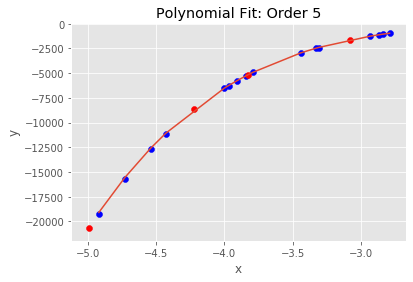

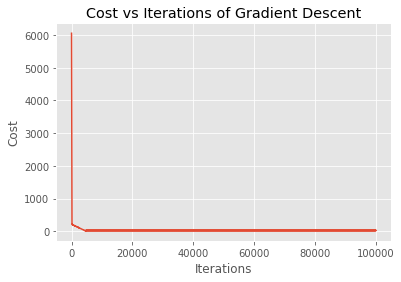

Training Cost: 28.001675503481763
Testing Cost: 49.39097831806089
Noise: 2991.9428949043377
mean_absolute_error
Calculating w by gradient descent
Polynomial Order:6
0.02 + 0.05x^1 + -0.10x^2 + 0.49x^3 + -1.11x^4 + 2.33x^5 + -1.05x^6
Using gradient descent


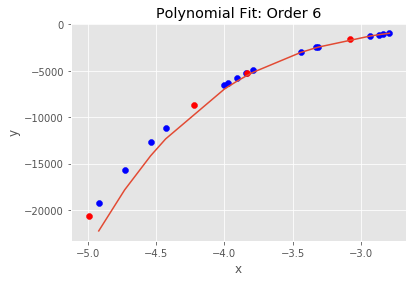

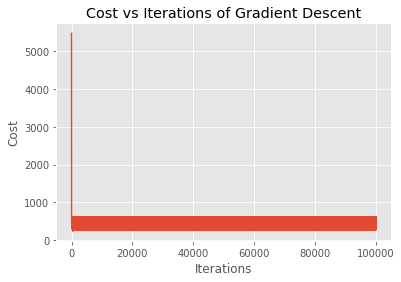

Training Cost: 621.3335610411718
Testing Cost: 1124.222990504212
Noise: 1534258.6766965291
mean_absolute_error
Calculating w by gradient descent
Polynomial Order:7
-0.06 + 0.01x^1 + -0.02x^2 + -0.04x^3 + -0.06x^4 + -0.02x^5 + -0.08x^6 + 0.11x^7
Using gradient descent


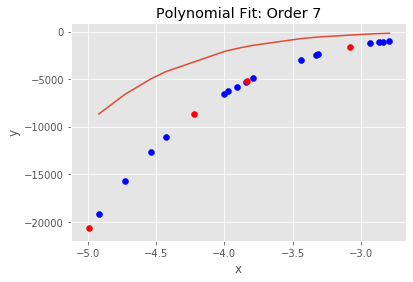

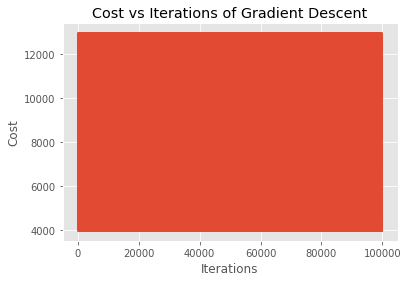

Training Cost: 3965.063790819844
Testing Cost: 5412.031573101725
Noise: 28173739.814165406
mean_absolute_error
Calculating w by gradient descent
Polynomial Order:8
0.08 + 0.31x^1 + 0.26x^2 + 0.02x^3 + -0.02x^4 + -0.13x^5 + -0.08x^6 + -0.09x^7 + -0.07x^8
Using gradient descent


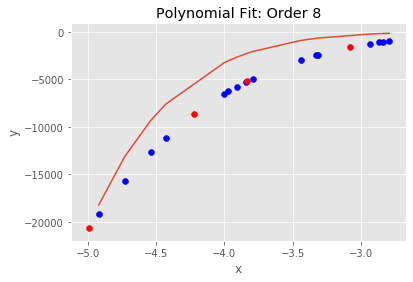

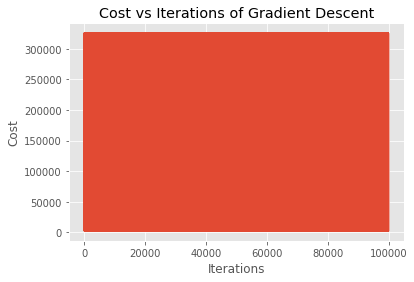

Training Cost: 2184.9809175235714
Testing Cost: 1992.1661025454864
Noise: 5745467.798573546
mean_absolute_error
Calculating w by gradient descent
Polynomial Order:9
-0.09 + 0.15x^1 + -0.05x^2 + -0.12x^3 + -0.22x^4 + 0.21x^5 + -0.03x^6 + 0.21x^7 + -0.05x^8 + -0.07x^9
Using gradient descent


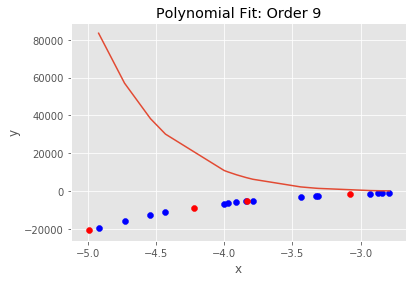

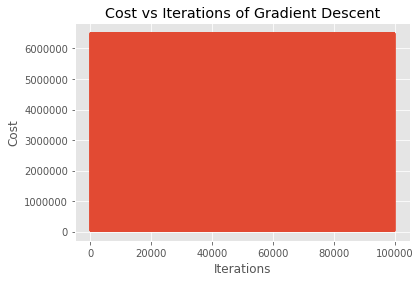

Training Cost: 22398.345453801096
Testing Cost: 39519.54783163903
Noise: 1783739903.3303993


In [16]:
for i in range(5,10):
    main_f(i,1,20, 5, 100000,10**-5, 0.0005, 1)

mean_absolute_error
Calculating w by gradient descent
Polynomial Order:6
-0.06 + -0.02x^1 + 0.10x^2 + 0.19x^3 + -0.21x^4 + 0.74x^5 + -1.27x^6
Using gradient descent


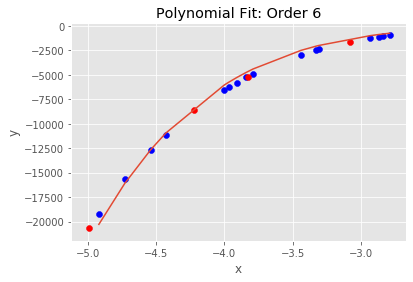

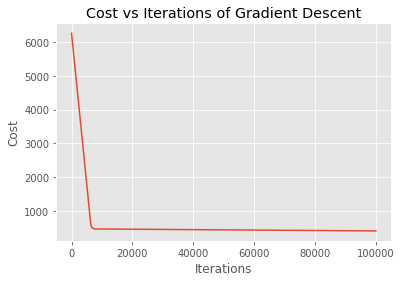

Training Cost: 406.0910229828845
Testing Cost: 650.8620555530035
Noise: 292507.9636535174
mean_absolute_error
Calculating w by gradient descent
Polynomial Order:7
0.13 + -0.12x^1 + -0.00x^2 + 0.10x^3 + -0.24x^4 + 0.95x^5 + -1.83x^6 + -0.13x^7
Using gradient descent


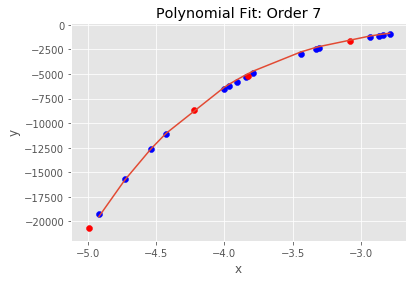

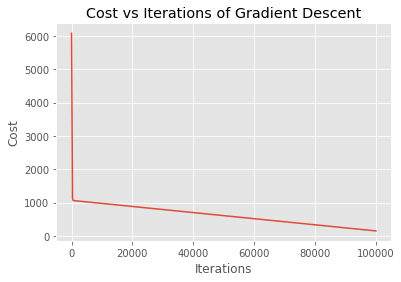

Training Cost: 149.73715633309325
Testing Cost: 209.63583478706158
Noise: 31800.825713168724
mean_absolute_error
Calculating w by gradient descent
Polynomial Order:8
-0.24 + -0.06x^1 + 0.09x^2 + 0.08x^3 + -0.03x^4 + 0.28x^5 + -0.29x^6 + 0.79x^7 + 0.12x^8
Using gradient descent


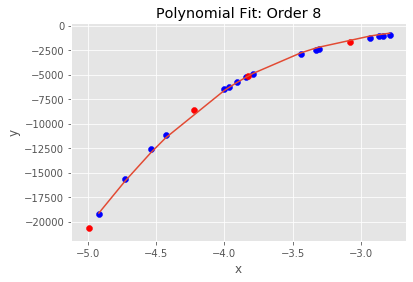

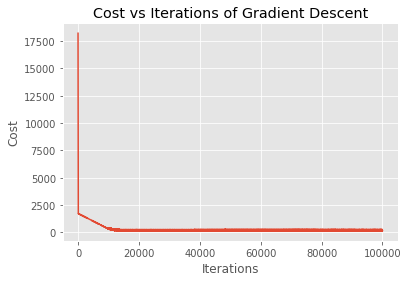

Training Cost: 153.60629541610666
Testing Cost: 179.15429728137786
Noise: 34678.97880163918
mean_absolute_error
Calculating w by gradient descent
Polynomial Order:9
0.07 + -0.20x^1 + -0.00x^2 + -0.02x^3 + -0.06x^4 + 0.01x^5 + -0.14x^6 + 0.10x^7 + -0.37x^8 + -0.06x^9
Using gradient descent


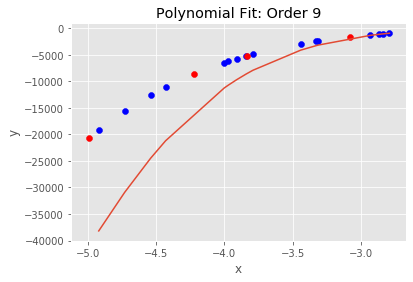

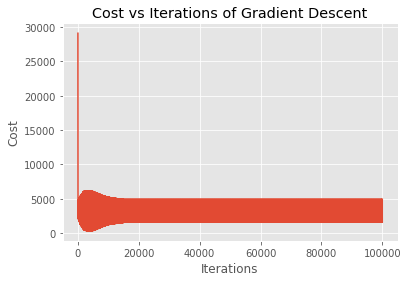

Training Cost: 4919.521340387098
Testing Cost: 7778.149216769297
Noise: 69656098.80822796


In [19]:
for i in range(6,10):
    main_f(i,1,20, 5, 100000,10**-5, 0.00000005, 1)

mean_absolute_error
Calculating w by gradient descent
Polynomial Order:9
0.02 + 0.11x^1 + 0.19x^2 + -0.07x^3 + 0.10x^4 + 0.22x^5 + -0.02x^6 + 0.07x^7 + 0.06x^8 + 0.01x^9
Using gradient descent


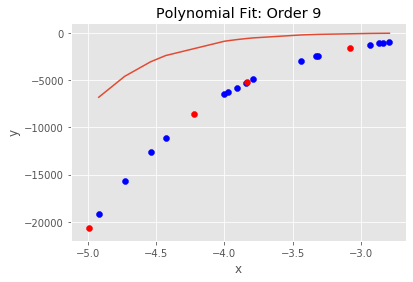

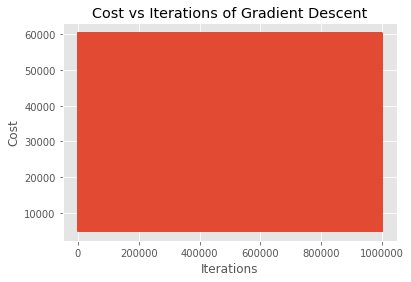

Training Cost: 4898.280625195296
Testing Cost: 6527.918939177318
Noise: 41655344.51134403


In [33]:
main_f(9,1,20, 5, 1000000,10**-5, 0.0000005, 1)

mean_absolute_error
Calculating w by gradient descent
Polynomial Order:9
0.02 + 0.18x^1 + -0.16x^2 + 0.08x^3 + -0.05x^4 + 0.50x^5 + -0.68x^6 + 0.92x^7 + 0.20x^8 + 0.00x^9
Using gradient descent


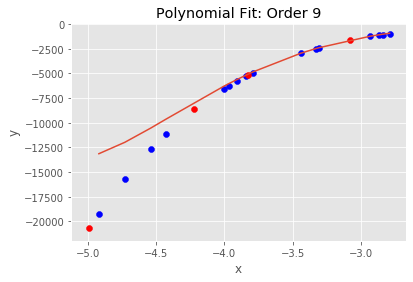

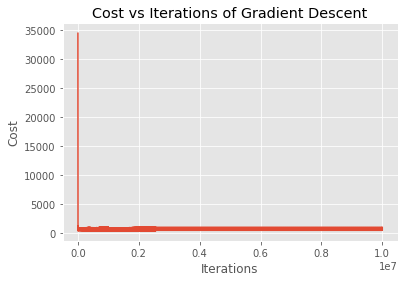

Training Cost: 897.8867585551371
Testing Cost: 2014.9851341473957
Noise: 5519292.113500684


In [34]:
main_f(9,1,20, 5, 10000000,10**-5, 0.00000001, 1)

In [ ]:
main_f(9,1,20, 5, 10000000,10**-5, 0.0000000001, 1)

mean_absolute_error
Calculating w by gradient descent
Polynomial Order:9
